In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import matplotlib as mpl

In [12]:
df = pd.read_csv('data/AllIndiaBulletins_Master.csv')
city = 'Kanpur'
df = df[df.City == city]
df['date'] = pd.to_datetime(df['date'])

C:\Users\dskcy\AppData\Local\Temp\ipykernel_2148\3680765599.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/AllIndiaBulletins_Master.csv')


In [13]:
# Create a dataframe with a single column - dates of 2023 -- We are producing pollution stripes for one year
daily_dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
template = pd.DataFrame({'date': daily_dates})

In [14]:
df = template.merge(df, on='date', how='left') #Remove this code if you dont want dates without data in calendar
df = df.fillna(-1)

In [15]:
# Define the conditions for each category
conditions = [
    (df['Index Value'] < 0), # Null values are replaced with -1 - this category is for that - remove it if null calendary years are not needed
    (df['Index Value'] <= 50),
    (df['Index Value'] > 50) & (df['Index Value'] <= 100),
    (df['Index Value'] > 100) & (df['Index Value'] <= 200),
    (df['Index Value'] > 200) & (df['Index Value'] <= 300),
    (df['Index Value'] > 300) & (df['Index Value'] <= 400),
    (df['Index Value'] > 400)
]
categories = [1, 2, 3, 4, 5, 6, 7] #Should be 6 - +1 for the null value category.
df['AQI'] = np.select(conditions, categories, default='outlier')
df['AQI'] = df['AQI'].astype(int)

In [16]:
aqi_colors = ['#eeeeeeff', # Null values are replaced with -1 - this color is for that - remove it if nulls are not needed
              '#274e13ff', '#93c47dff', '#f2f542', '#f59042', '#ff0000', '#753b3b']


aqi_colors = [aqi_colors[i-1] for i in sorted(df['AQI'].unique())]
# Create a custom discrete colormap for AQI
cmap = ListedColormap(aqi_colors)
aqi_ranges = [0, 50, 100, 200, 300, 400, 500]
norm = mpl.colors.BoundaryNorm(aqi_ranges, 6)


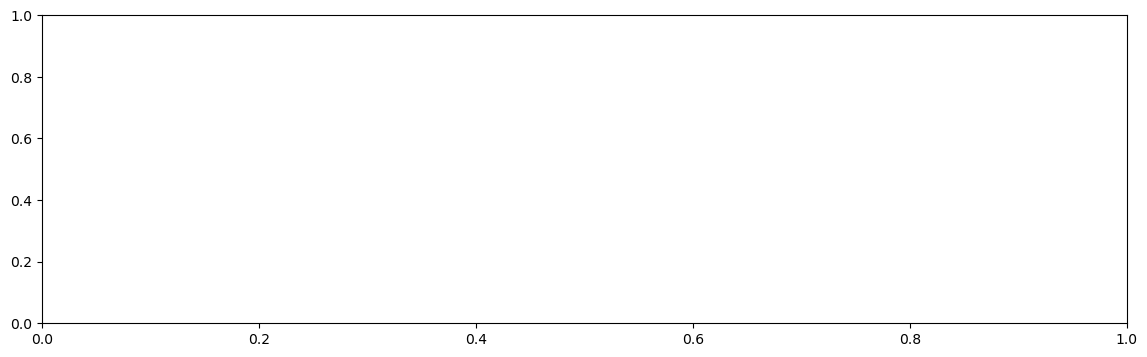

In [17]:
# Create the plot
fig,ax = plt.subplots(figsize=(14, 4))
#ax.set_axis_off()

In [18]:
# create a collection with a rectangle for each year
col = PatchCollection([Rectangle((y, 0), 1, 1) for y in range(0, 365 + 1)], zorder=1)
# set data, colormap and color limits
col.set_array(df['Index Value'])
col.set_cmap(cmap)
col.set_norm(norm)

ax.add_collection(col)

In [19]:
ax.set_ylim(0, 1)
ax.set_xlim(0, 365)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

ax.set_title(city+', 2022', fontsize=20, loc='left', y=1.03)

Text(0.0, 1.03, 'Kanpur, 2022')

In [20]:
# ax2 = ax.twinx()
# ax2.plot(df.date, df['Index Value'], color='black', linewidth=1.5, )
# ax2.yaxis.tick_left()
# ax2.yaxis.set_label_position('left')
# ax2.set_ylabel('AQI')

In [21]:
plt.figtext(0.856, 0.087, '© UrbanEmissions', fontsize=7)
plt.figtext(0.907, 0.15, 'Data source: CPCB AQI Bulletins',
            rotation=270, fontsize=7)

plotfile = 'pollution-stripes.png'
fig.savefig('visuals/'+plotfile, bbox_inches='tight', facecolor='white')

<Figure size 640x480 with 0 Axes>

# References
1. [Stripes with trend](https://docs.dkrz.de/doc/visualization/sw/python/source_code/python-matplotlib-warming-stripes-and-trend.html)
2. [Warming Stripes - Matplotlib blog](https://matplotlib.org/matplotblog/posts/warming-stripes/)